# Teste de Downscaling
Localidade alvo: média aritmética entre quatro estações INMET selecionadas.

Definindo quatro estações próximas para interpolar dados

Interpolar cada dado por dia, criando o dataframe pra locação

Avaliar pelo método o erro inerente na interpolação

            Data  Hora UTC  precTotal   pMed   pMax   pMin         rad  tMed  \
0     2023/01/01  0000 UTC        NaN    NaN    NaN    NaN    0.000000   NaN   
1     2023/01/01  0100 UTC        NaN    NaN    NaN    NaN    0.000000   NaN   
2     2023/01/01  0200 UTC        NaN    NaN    NaN    NaN    0.000000   NaN   
3     2023/01/01  0300 UTC        NaN    NaN    NaN    NaN    0.000000   NaN   
4     2023/01/01  0400 UTC        NaN    NaN    NaN    NaN    0.000000   NaN   
...          ...       ...        ...    ...    ...    ...         ...   ...   
8755  2023/12/31  1900 UTC        0.0  966.6  967.5  966.6  701.666667  31.4   
8756  2023/12/31  2000 UTC        0.0  965.8  966.6  965.7  532.638889  31.1   
8757  2023/12/31  2100 UTC        0.0  965.7  965.8  965.7  247.250000  29.9   
8758  2023/12/31  2200 UTC        0.0  966.6  966.6  965.6   84.611111  29.2   
8759  2023/12/31  2300 UTC        0.0  967.3  967.3  966.6    5.333333  28.1   

      tOrv  tMax  tMin  tOrvMax  tOrvMi

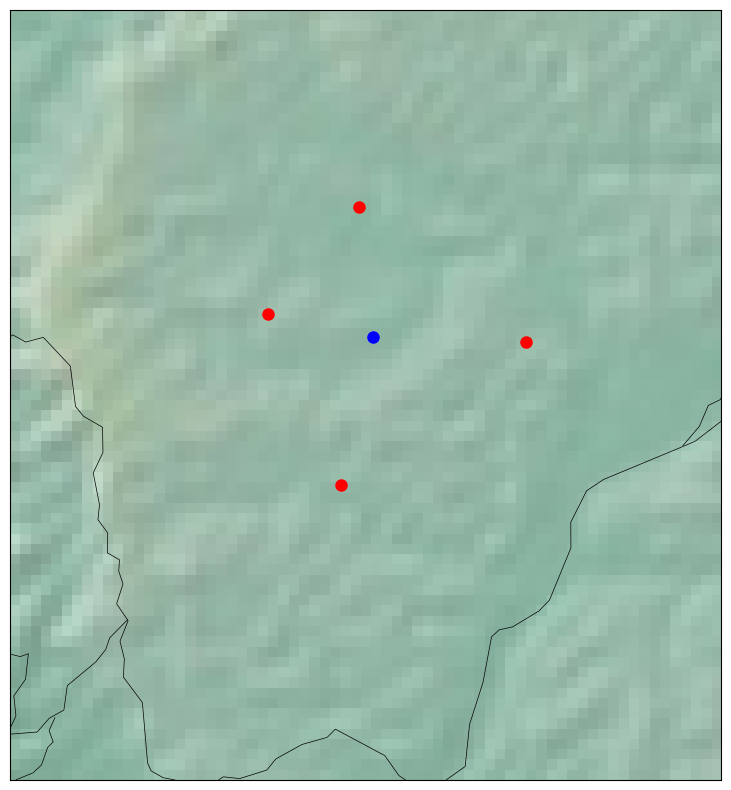

Porcentagem de NaN dos dataframes:
Data             0.000000
Hora UTC         0.000000
precTotal       13.561644
pMed            12.922374
pMax            13.607306
pMin            13.607306
rad              0.000000
tMed            12.922374
tOrv            12.979452
tMax            13.607306
tMin            13.607306
tOrvMax         13.664384
tOrvMin         13.664384
umidMax         13.664384
umidMin         13.664384
umid            12.979452
dirVento        13.047945
ventoRaj        13.824201
ventoHor        13.047945
Unnamed: 19    100.000000
dtype: float64
16.60958904109589


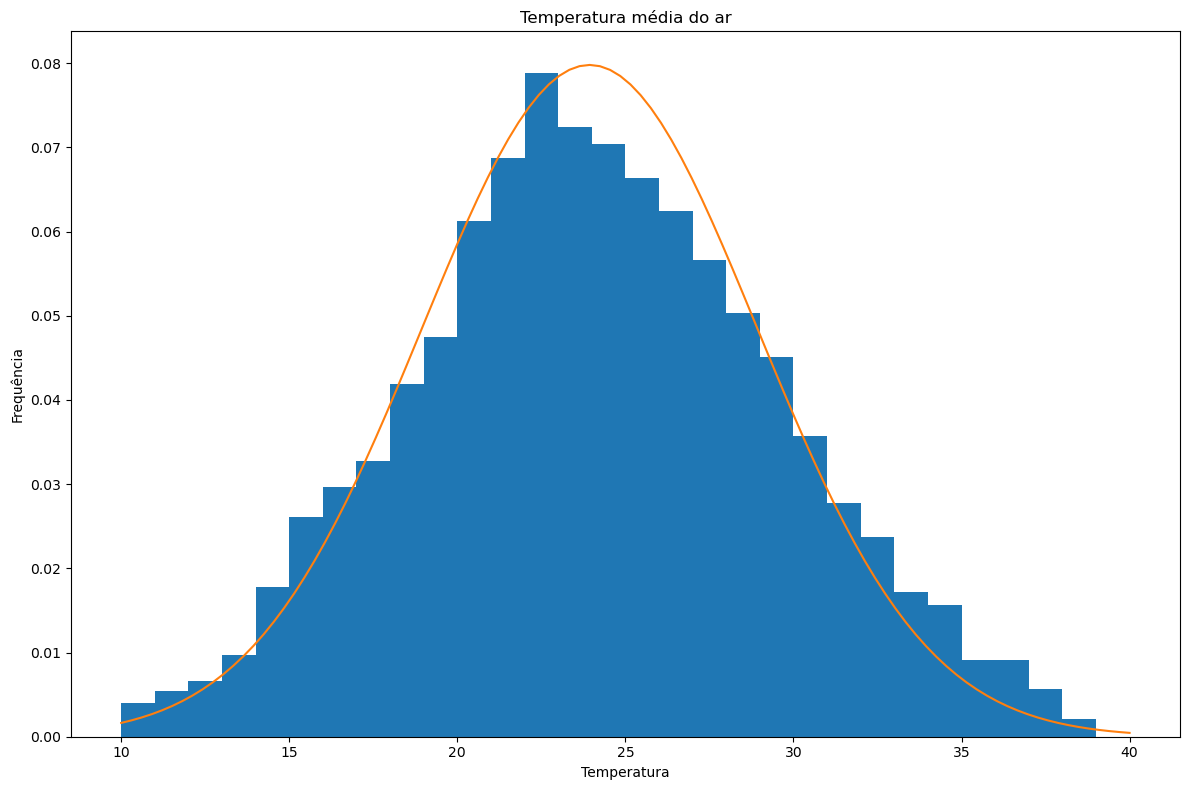

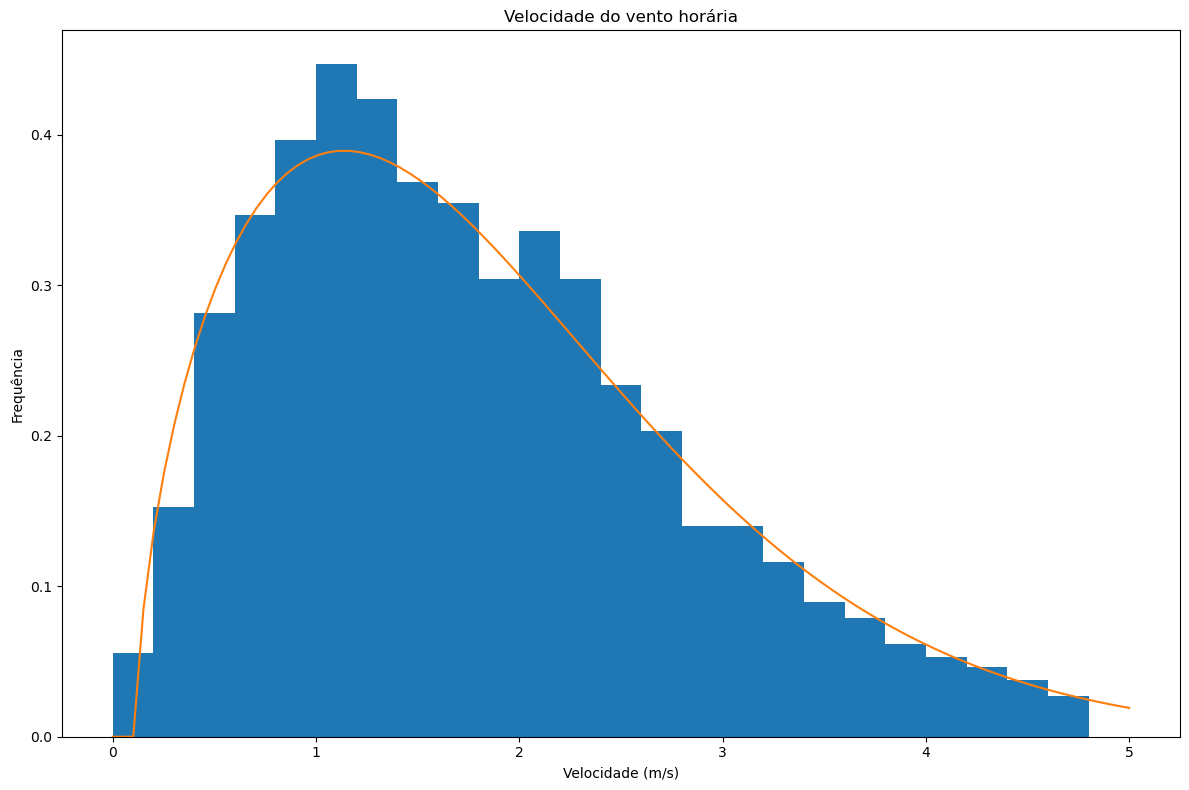

        tMed   vMed      radMed      tCond
0        NaN    NaN    0.000000        NaN
1        NaN    NaN    0.000000        NaN
2        NaN    NaN    0.000000        NaN
3        NaN    NaN    0.000000        NaN
4        NaN    NaN    0.000000        NaN
...      ...    ...         ...        ...
8755  30.300  3.050  629.493056  34.735681
8756  30.225  2.950  549.875000  34.188477
8757  29.275  2.050  227.201389  31.362018
8758  28.350  1.500   62.715278  29.053207
8759  26.900  1.975    3.673611  26.934597

[8760 rows x 4 columns]


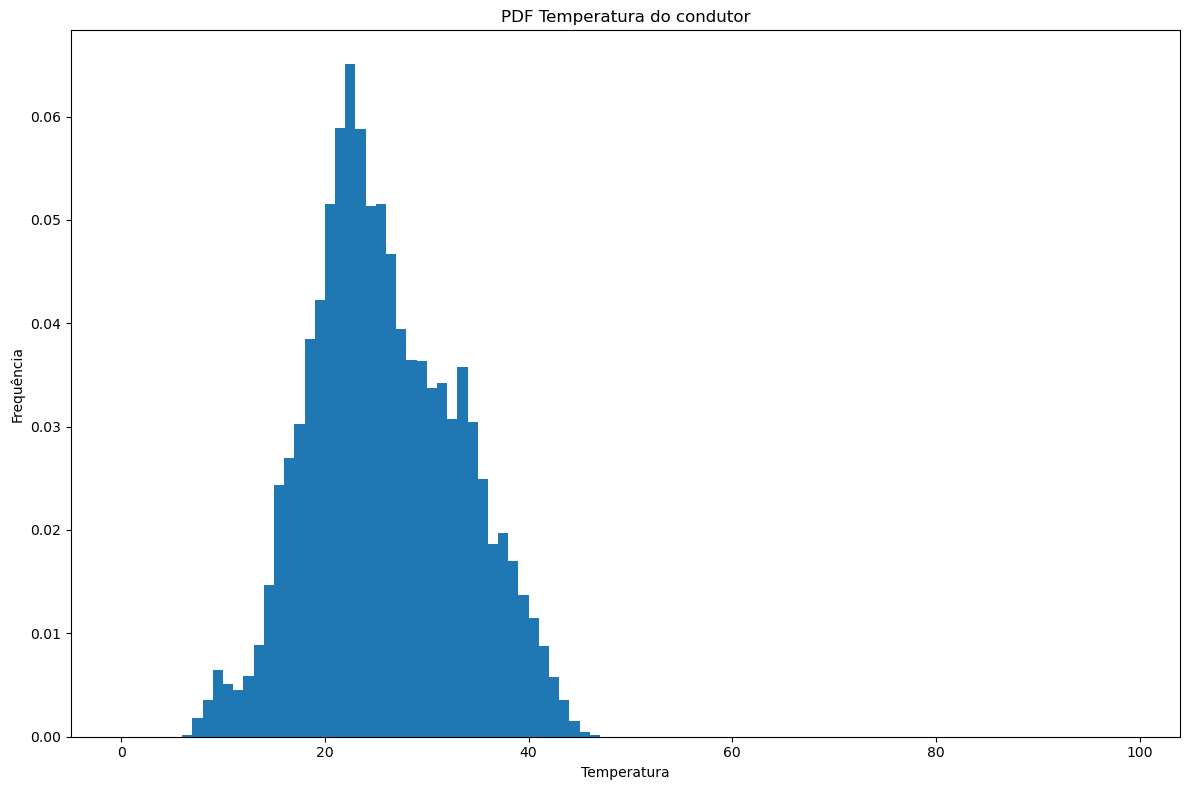

nan


ParameterError: Values for "beta" and "eta" not found; Run the "fit" method or assign values explicitly.

<Figure size 800x600 with 0 Axes>

In [12]:

from normaslt import geral
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.basemap import Basemap
from statistics import mean 
from math import pi
import pandas as pd
import numpy as np
from scipy import stats
import weibull

# Recarrega as libs para fins de desenvolvimento
import importlib
importlib.reload(geral)

def plot_geolocation():
    # Create a new map with a specific projection (e.g., Mercator)
    map = Basemap(projection='merc', llcrnrlat=-24, urcrnrlat=-21, llcrnrlon=-56, urcrnrlon=-53, lat_ts=40, resolution='i')

    # Draw coastlines, countries, and states
    map.drawcoastlines()
    map.drawcountries()
    map.drawstates()
    map.shadedrelief()

    df1, lat1, long1 = geral.readEstacao('Ivinhema', 2023, 2023)
    df2, lat2, long2 = geral.readEstacao('Juti', 2023, 2023)
    df3, lat3, long3 = geral.readEstacao('Dourados', 2023, 2023)
    df4, lat4, long4 = geral.readEstacao('Rio Brilhante', 2023, 2023)
    print(df1)
    latm = mean([lat1, lat2, lat3, lat4])
    longm = mean([long1, long2, long3, long4])
    x1, y1 = map(long1, lat1)
    x2, y2 = map(long2, lat2)
    x3, y3 = map(long3, lat3)
    x4, y4 = map(long4, lat4)
    xm, ym = map(longm, latm)
    map.plot(x1, y1, 'ro', markersize=8)
    map.plot(x2, y2, 'ro', markersize=8)
    map.plot(x3, y3, 'ro', markersize=8)
    map.plot(x4, y4, 'ro', markersize=8)
    map.plot(xm, ym, 'bo', markersize=8)
    plt.show()
    dfAmp = pd.DataFrame()
    # Ver como a média trata NaN
    dfAmp['tMed'] = (df1['tMed'] + df2['tMed'] + df3['tMed'] + df4['tMed'])/4
    print('Porcentagem de NaN dos dataframes:')
    print(df1.isna().sum()/len(df1) * 100)
    print(dfAmp['tMed'].isna().sum()/len(dfAmp['tMed']) * 100)
    fig, ax = plt.subplots(1,1)
    ax.hist(dfAmp['tMed'], bins=np.arange(10., 40., 1.), density=True);
    dist = stats.norm
    res = stats.fit(dist, dfAmp['tMed'][np.isfinite(dfAmp['tMed'])], [(0, 40), (0.5, 5)])
    x = np.linspace(10, 40, 100)
    ax.plot(x, stats.norm.pdf(x, *res.params))
    plt.xlabel('Temperatura')
    plt.ylabel('Frequência')
    plt.title('Temperatura média do ar')
    plt.show()
    dfAmp['vMed'] = (df1['ventoHor'] + df2['ventoHor'] + df3['ventoHor'] + df4['ventoHor'])/4
    fig, ax = plt.subplots(1,1)
    ax.hist(dfAmp['vMed'], bins=np.arange(0, 5, 0.2), density=True);
    dist = stats.weibull_min
    res = stats.fit(dist, dfAmp['vMed'][np.isfinite(dfAmp['vMed'])], [(0, 10), (0.1, 2), (0.1, 10)])
    x = np.linspace(0, 5, 100)
    ax.plot(x, stats.weibull_min.pdf(x, *res.params))
    plt.xlabel('Velocidade (m/s)')
    plt.ylabel('Frequência')
    plt.title('Velocidade do vento horária')
    plt.show()
    dfAmp['radMed'] = (df1['rad'] + df2['rad'] + df3['rad'] + df4['rad'])/4

    # Hipótese 1: vento conforme estatśitica

    dfAmp['tCond'] = dfAmp.apply(ampacDF, axis=1)
    print(dfAmp)

    fig, ax = plt.subplots(1,1)
    ax.hist(dfAmp['tCond'], bins=np.arange(0., 100., 1.), density=True);
    plt.xlabel('Temperatura')
    plt.ylabel('Frequência')
    plt.title('PDF Temperatura do condutor')
    plt.show()   
    print(max(dfAmp['tCond']))

    plt.figure(figsize=(8, 6))
    analysis = weibull.Analysis(dfAmp['tCond'][np.isfinite(dfAmp['tCond'])], unit='Temperatura')
    analysis.fit()
    analysis.probplot()

    # Hipótese 2: vento saturado em 1 m/s
    dfAmp['vMed'][dfAmp['vMed'] > 1.] = 1.
    fig, ax = plt.subplots(1,1)
    ax.hist(dfAmp['vMed'], bins=np.arange(0, 5, 0.2), density=True);
    plt.xlabel('Velocidade (m/s)')
    plt.ylabel('Frequência')
    plt.title('Velocidade do vento horária')
    plt.show()
    dfAmp['tCond'] = dfAmp.apply(ampacDF, axis=1)
    print(dfAmp)
    fig, ax = plt.subplots(1,1)
    ax.hist(dfAmp['tCond'], bins=np.arange(0., 100., 1.), density=True);
    plt.xlabel('Temperatura')
    plt.ylabel('Frequência')
    plt.title('PDF Temperatura do condutor')
    plt.show()   
    print(max(dfAmp['tCond']))

    # Hipótese 2: vento constante 1 m/s
    dfAmp['vMed'] = 1.
    dfAmp['tCond'] = dfAmp.apply(ampacDF, axis=1)
    print(dfAmp)
    fig, ax = plt.subplots(1,1)
    ax.hist(dfAmp['tCond'], bins=np.arange(0., 100., 1.), density=True);
    plt.xlabel('Temperatura')
    plt.ylabel('Frequência')
    plt.title('PDF Temperatura do condutor')
    plt.show()   
    print(max(dfAmp['tCond']))


def ampacDF(row):
    if row.isnull().any():
        return None
    cabo = geral.dbCabo.CAA_RAIL
    amp = 1000. # TODO separar por corrente nominal e emergência
    alt = 20.
    angVento = pi/4 # sendo conservador em não assumir incidência a 90°?
    return geral.tempCondutorCigre(amp, row['vMed'], angVento, row['tMed'], row['radMed'], alt, cabo)

plot_geolocation()